# QRNN Classification

This notebook uses the QRNN trained on GPM surface precipitation to classify raining and non-raining pixels.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import ipywidgets as w
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


# Load QRNN and data

In [3]:
from typhon.retrieval.qrnn import QRNN
qrnn = QRNN.load("../../models/qrnn_6_256_all_surfaces.nc")

In [4]:
from regn.data import GprofData
test_data = GprofData("../../data/test_data_small.nc", batch_size = 1024)

# Classify test data

In [5]:
p = []
y_true = []
threshold = 0.02
for i in range(len(test_data)):
    x, y = test_data[i]
    y_true.append(y)
    p.append(qrnn.classify(x, threshold))
p = np.concatenate(p, axis=0)
y_true = np.concatenate(y_true, axis=0)

## Evaluate performance

In [11]:
from regn.utils import compute_roc
fpr, tpr = compute_roc(p.ravel(), y_true > threshold, np.linspace(0, 1, 21))

Text(0.5, 1.0, 'Receiver-operator chracacteristic')

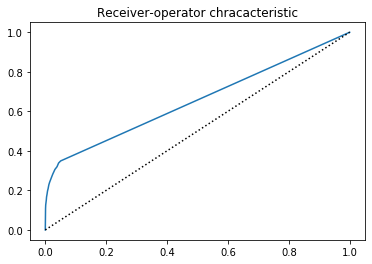

In [14]:
plt.plot(fpr, tpr)
x = np.linspace(0, 1, 1001)
plt.plot(x, x, ls = ":", c = "k")
plt.title("Receiver-operator chracacteristic")